# Project: Water potability 
By: odubajo abdul qoyyum


This notebook covers:
- Loading the data
- Data cleaning
- Data preprocessing and data wrangling
- Simple EDA and feature enginnering
- Creating a simple model
- Making a submission

### Importing libraries

In [1]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

###  Load the dataset

In [2]:
# Load files into a pandas dataframe
df = pd.read_csv('water_potability.csv',header=[0])

In [3]:
df=pd.DataFrame(df)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


###  Data Assessing and cleaning

In [4]:
# inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df.shape

(3276, 10)

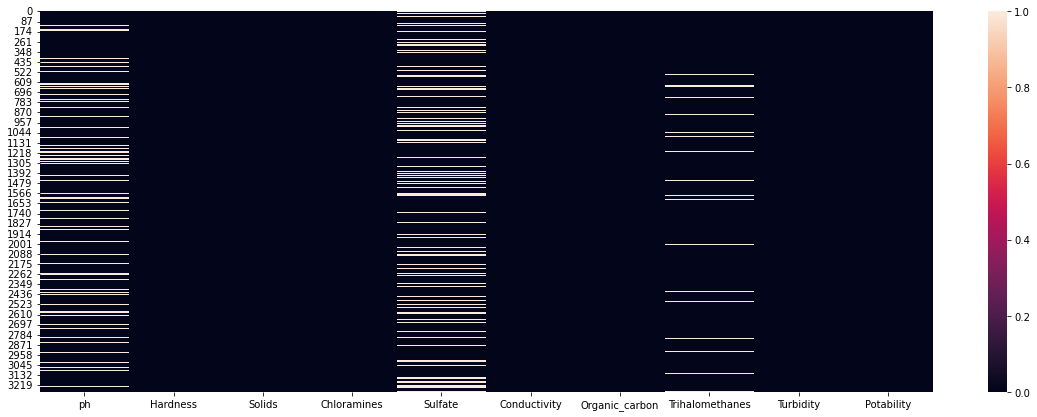

In [6]:
#check missing values
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df.isnull(), vmin=0, vmax = 1)

In [7]:
# replacing  na values with thier mean
df['ph']=df['ph'].fillna(df.ph.mean())
df['Sulfate']=df['Sulfate'].fillna(df.Sulfate.mean())
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df.Trihalomethanes.mean())

## Exploratory Data Analysis

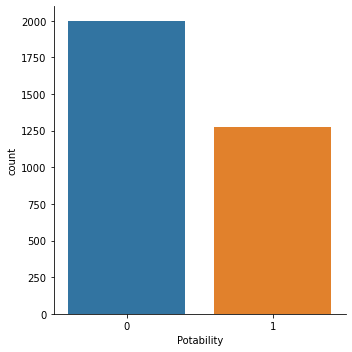

In [8]:
# Explore Target distribution 
sns.catplot(x="Potability", kind="count", data=df)

In [9]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


##### create a pairplot with the hue defined by the 'Potability' column feature.**

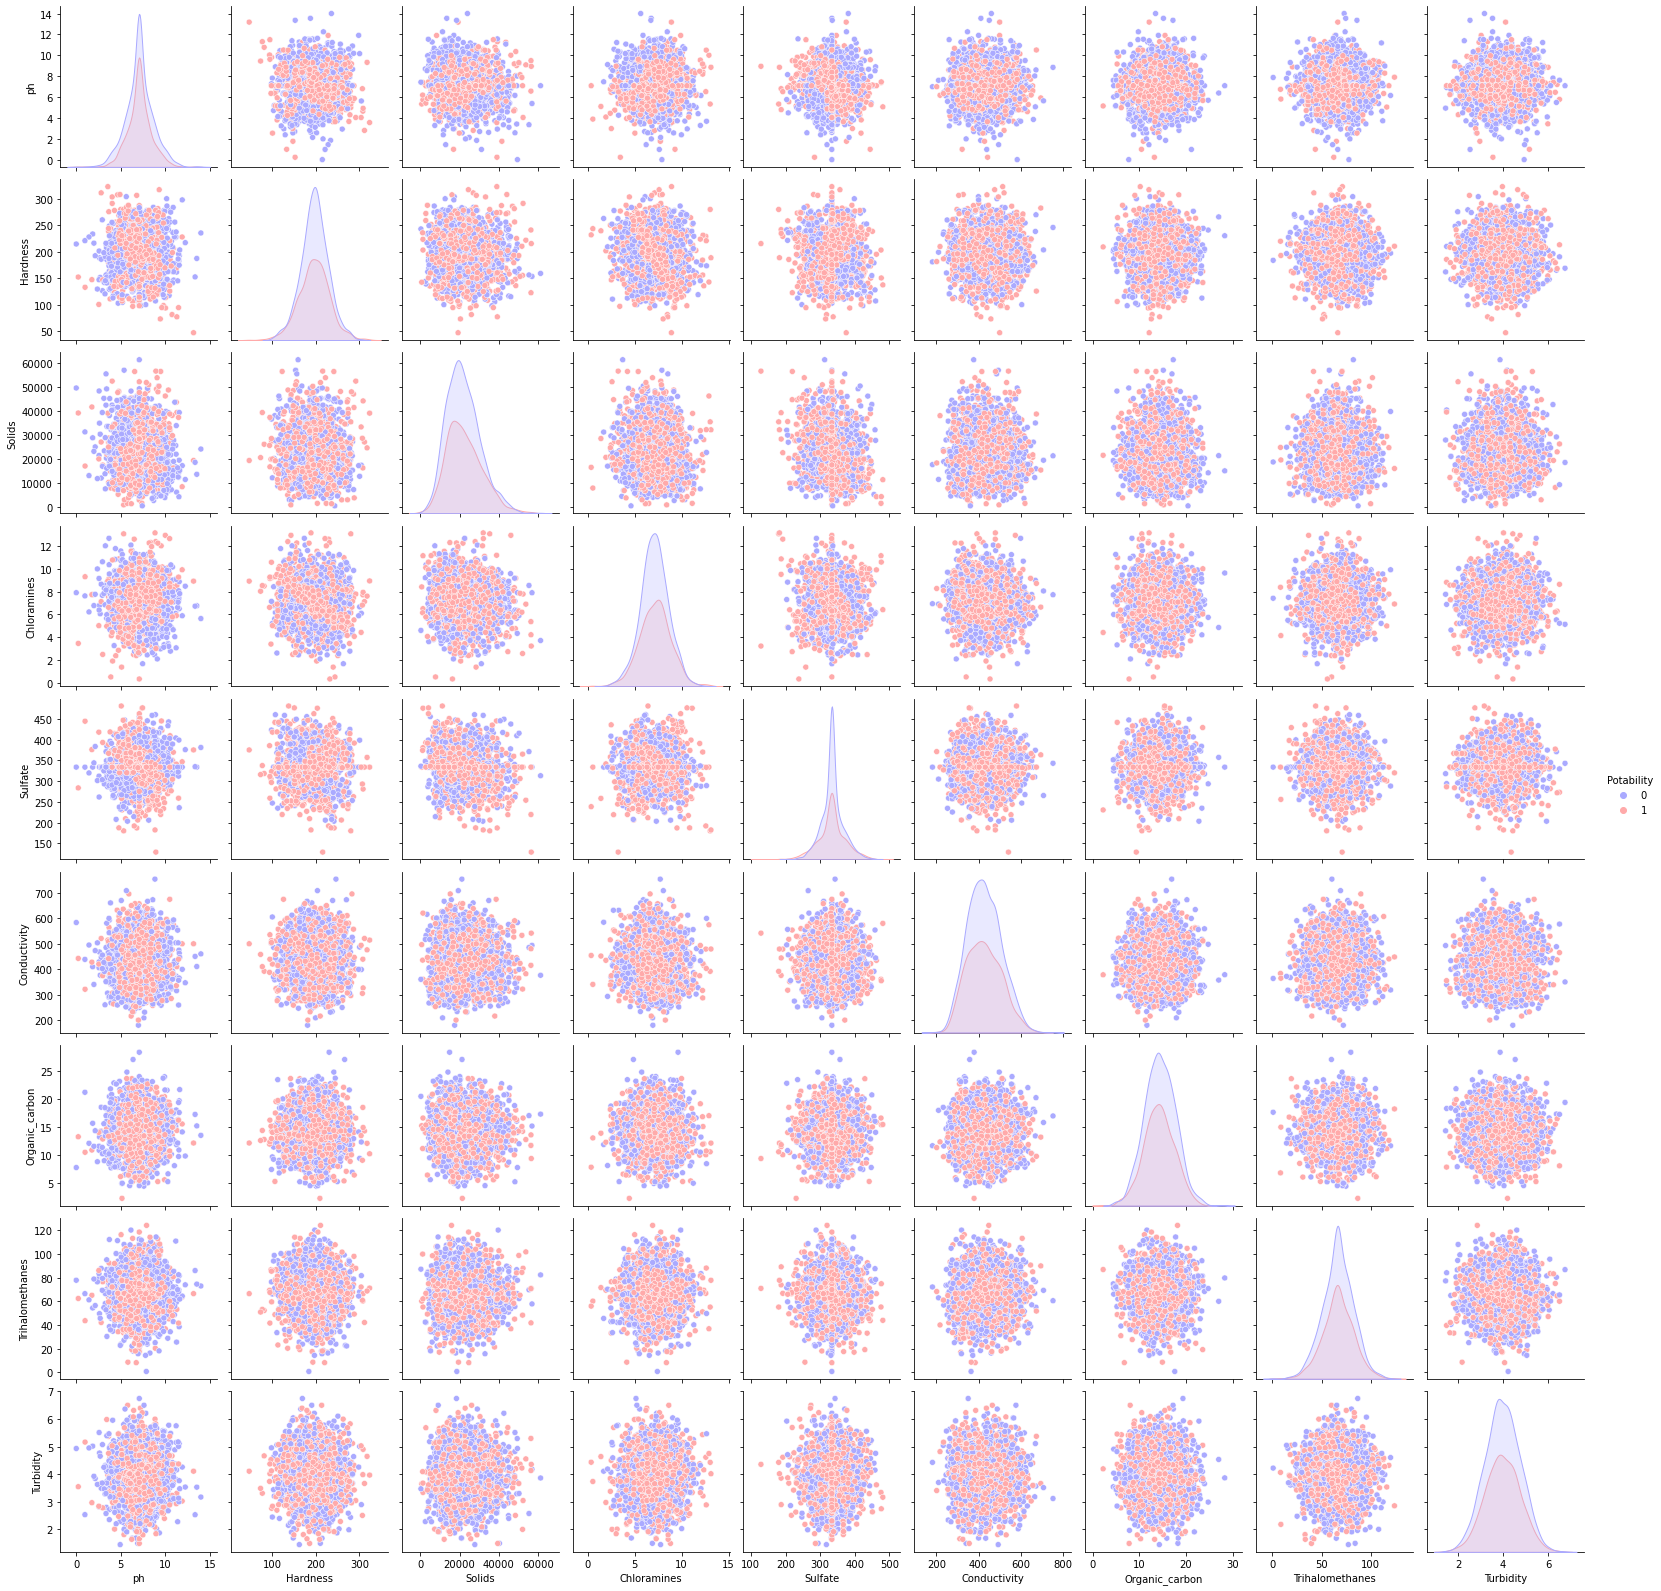

In [10]:
sns.pairplot(df,hue='Potability',palette='bwr')

## Data preprocessing  and model building

In [11]:
#import preprocessing module

from sklearn.pipeline import Pipeline
##feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

##### pipeline, handling missing values,feature scaling and feature selection

In [12]:
steps=[("imputation_mean",SimpleImputer(missing_values=np.nan,strategy="mean")),
    ("scaling",StandardScaler()),
      ("PCA",PCA(0.90)),
      ("SVC",SVC())]

In [13]:
pipe=Pipeline(steps)

#### model building

In [14]:
from sklearn.model_selection import train_test_split ,StratifiedKFold,GridSearchCV

In [15]:
X = df.drop('Potability',axis=1)
y = df['Potability']


### SVM model

In [16]:
params ={}
params['SVC__C']= [0.1,1, 10, 100]
params['SVC__gamma']= [1,0.1,0.01,0.001]
params['SVC__kernel']= ['rbf']

In [17]:
skf = StratifiedKFold(5, shuffle=True, random_state=1)

In [18]:
grid = GridSearchCV(pipe,params,refit=True,verbose=2,cv=skf)

In [19]:
# Split train_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [20]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ..........SVC__C=0.1, SVC__gamma=1, SVC__kernel=rbf; total time=   0.2s
[CV] END ..........SVC__C=0.1, SVC__gamma=1, SVC__kernel=rbf; total time=   0.3s
[CV] END ..........SVC__C=0.1, SVC__gamma=1, SVC__kernel=rbf; total time=   0.2s
[CV] END ..........SVC__C=0.1, SVC__gamma=1, SVC__kernel=rbf; total time=   0.2s
[CV] END ..........SVC__C=0.1, SVC__gamma=1, SVC__kernel=rbf; total time=   0.2s
[CV] END ........SVC__C=0.1, SVC__gamma=0.1, SVC__kernel=rbf; total time=   0.2s
[CV] END ........SVC__C=0.1, SVC__gamma=0.1, SVC__kernel=rbf; total time=   0.2s
[CV] END ........SVC__C=0.1, SVC__gamma=0.1, SVC__kernel=rbf; total time=   0.2s
[CV] END ........SVC__C=0.1, SVC__gamma=0.1, SVC__kernel=rbf; total time=   0.2s
[CV] END ........SVC__C=0.1, SVC__gamma=0.1, SVC__kernel=rbf; total time=   0.2s
[CV] END .......SVC__C=0.1, SVC__gamma=0.01, SVC__kernel=rbf; total time=   0.2s
[CV] END .......SVC__C=0.1, SVC__gamma=0.01, SVC

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('imputation_mean', SimpleImputer()),
                                       ('scaling', StandardScaler()),
                                       ('PCA', PCA(n_components=0.9)),
                                       ('SVC', SVC())]),
             param_grid={'SVC__C': [0.1, 1, 10, 100],
                         'SVC__gamma': [1, 0.1, 0.01, 0.001],
                         'SVC__kernel': ['rbf']},
             verbose=2)

In [21]:
y_pred=grid.predict(X_test)

In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.92      0.79       618
           1       0.69      0.30      0.42       365

    accuracy                           0.69       983
   macro avg       0.69      0.61      0.60       983
weighted avg       0.69      0.69      0.65       983



- Our svm model performs well on predicting class 0 and performs poorly on predicting class 1

### XGboost model

In [24]:
#import classifier algorithm here

from xgboost import XGBClassifier


In [25]:
steps_2=[("imputation_mean",SimpleImputer(missing_values=np.nan,strategy="mean")),
    ("scaling",StandardScaler()),
      ("PCA",PCA(0.90)),
      ("xg_model",XGBClassifier())]

In [26]:
pipe2=Pipeline(steps_2)

In [27]:
params_2 ={}
params_2['xg_model__max_depth']= [3, 5]
params_2['xg_model__subsample']=[0.6, 0.8, 1.0]
params_2['xg_model__gamma']= [0.5, 1]

In [28]:
grid_2 = GridSearchCV(pipe2,params_2,n_jobs=-1,refit=True,verbose=2,cv=skf)

In [29]:
grid_2.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('imputation_mean', SimpleImputer()),
                                       ('scaling', StandardScaler()),
                                       ('PCA', PCA(n_components=0.9)),
                                       ('xg_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_round...
                                                      max_delta_step=None,
                                                      max_dep

In [30]:
y_pred2=grid_2.predict(X_test)

In [31]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74       618
           1       0.53      0.38      0.44       365

    accuracy                           0.65       983
   macro avg       0.61      0.59      0.59       983
weighted avg       0.63      0.65      0.63       983



- we were able to improve the recall and f1-score of the `1` class